<a href="https://colab.research.google.com/github/filipesartori/Inteligencia-Artificial/blob/main/Fuzzy_Exemplo_Gorjeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy - Gorjetas

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?

* ruim, aceitável, ótimo


Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?

* ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?

* baixa, média, alta

Regras

* Se a qualidade da comida for ruim ou o serviço for ruim então a gorjeta será baixa
* Se o serviço for médio então a gorjeta será média
* Se o serviço for bom e a qualidade da comida for saborosa então a gorjeta será alta

# Instalação e importação das bibliotecas

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedente e Conseguente

In [ ]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

# Funções Membership

In [ ]:
qualidade.automf(number=3, names=['ruim', 'satisfatoria', 'saborosa'])
servico.automf(number=3, names=['ruim', 'satisfatorio', 'otimo'])

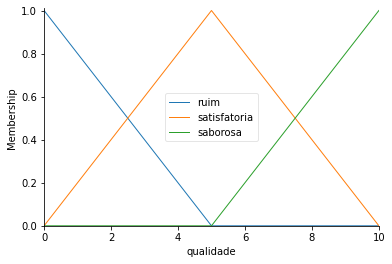

In [ ]:
qualidade.view()

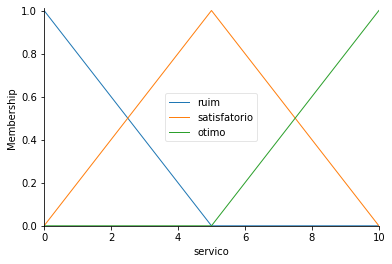

In [ ]:
servico.view()

In [ ]:
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 7])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [5, 10, 16]) 
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [13, 20, 20])  

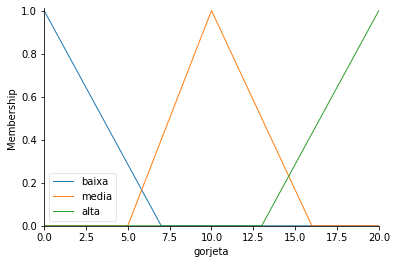

In [ ]:
gorjeta.view()

In [ ]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['satisfatorio'], gorjeta['media'])
regra3 = ctrl.Rule(qualidade['saborosa'] | servico['otimo'], gorjeta['alta'])

# Sistema de controle

In [ ]:
controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
sistema = ctrl.ControlSystemSimulation(controle)

In [ ]:
sistema.input['qualidade'] = 10
sistema.input['servico'] = 10
sistema.compute()

17.666666666666664


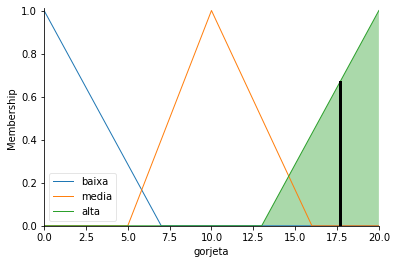

In [ ]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)